In [1]:
import numpy as np
import pandas as pd
import nltk
import string

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
headerNames = ['Text', 'Sentiment']
reviews = pd.read_csv("imdb_labelled.txt", sep='\t', names=headerNames)

In [3]:
reviews.head()

,Text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
reviews.shape

(748, 2)

In [5]:
reviews['Sentiment'].value_counts()

1    386
0    362
Name: Sentiment, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])

[0 0 0 0 1 0 0 1 0 1]
0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Sentiment, dtype: int64


In [7]:
reviews = reviews.astype({'Text':'string'})

In [8]:
text = reviews['Text']
text[:5]

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3         Very little music or anything to speak of.  
4    The best scene in the movie was when Gerardo i...
Name: Text, dtype: string

In [9]:
text1 = []

for review in text:
    review = review.translate(str.maketrans('','',string.punctuation))
    review = review.translate(str.maketrans('','',string.digits))
    review = review.lower()
    text1.append(review)

text1[:5]

['a very very very slowmoving aimless movie about a distressed drifting young man  ',
 'not sure who was more lost  the flat characters or the audience nearly half of whom walked out  ',
 'attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  ',
 'very little music or anything to speak of  ',
 'the best scene in the movie was when gerardo is trying to find a song that keeps running through his head  ']

In [10]:
text1 = pd.Series(text1)
text1[:5]

0    a very very very slowmoving aimless movie abou...
1    not sure who was more lost  the flat character...
2    attempting artiness with black  white and clev...
3          very little music or anything to speak of  
4    the best scene in the movie was when gerardo i...
dtype: object

In [11]:
stop_words = set(stopwords.words('english'))
text1 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words) )
text1[:5]

0    slowmoving aimless movie distressed drifting y...
1    sure lost flat characters audience nearly half...
2    attempting artiness black white clever camera ...
3                          little music anything speak
4    best scene movie gerardo trying find song keep...
dtype: object

In [12]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
text2 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w) for w in x.split()))
text2[:5]

0    slowmoving aimless movie distressed drifting y...
1    sure lost flat character audience nearly half ...
2    attempting artiness black white clever camera ...
3                          little music anything speak
4    best scene movie gerardo trying find song keep...
dtype: object

In [13]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()
text3 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:5]

0    slowmoving aimless movie distressed drift youn...
1    sure lose flat character audience nearly half ...
2    attempt artiness black white clever camera ang...
3                          little music anything speak
4    best scene movie gerardo try find song keep ru...
dtype: object

In [14]:
ps = nltk.PorterStemmer()

text4 = text1.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
text4[:5]

0        slowmov aimless movi distress drift young man
1      sure lost flat charact audienc nearli half walk
2    attempt arti black white clever camera angl mo...
3                              littl music anyth speak
4    best scene movi gerardo tri find song keep run...
dtype: object

In [15]:
reviews1 = list(zip(text3, label))

reviewsP = pd.DataFrame(reviews1, columns = ['Review', 'Sentiment'])
reviewsP

,Review,Sentiment
0,slowmoving aimless movie distressed drift youn...,0
1,sure lose flat character audience nearly half ...,0
2,attempt artiness black white clever camera ang...,0
3,little music anything speak,0
4,best scene movie gerardo try find song keep ru...,1
...,...,...
743,get bore watch jessice lange take clothes,0
744,unfortunately virtue film production work lose...,0
745,word embarrass,0
746,exceptionally bad,0


In [16]:
cv=CountVectorizer()
cv_reviews = cv.fit_transform(reviewsP['Review'])
cv.get_feature_names_out()

array(['aailiyah', 'abandon', 'ability', ..., 'zombie', 'zombiestudents',
       'zombiez'], dtype=object)

In [17]:
print(cv_reviews)

  (0, 2070)	1
  (0, 49)	1
  (0, 1494)	1
  (0, 625)	1
  (0, 654)	1
  (0, 2616)	1
  (0, 1395)	1
  (1, 2217)	1
  (1, 1368)	1
  (1, 881)	1
  (1, 337)	1
  (1, 138)	1
  (1, 1522)	1
  (1, 1028)	1
  (1, 2513)	1
  (2, 1494)	1
  (2, 135)	1
  (2, 118)	1
  (2, 215)	1
  (2, 2555)	1
  (2, 383)	1
  (2, 292)	1
  (2, 81)	1
  (2, 609)	1
  (2, 185)	1
  :	:
  (743, 2242)	1
  (743, 2524)	1
  (743, 970)	1
  (743, 244)	1
  (743, 1295)	1
  (743, 1237)	1
  (743, 390)	1
  (744, 1368)	1
  (744, 2587)	1
  (744, 855)	1
  (744, 1967)	1
  (744, 2433)	1
  (744, 1763)	1
  (744, 2495)	1
  (744, 1842)	1
  (745, 2585)	1
  (745, 702)	1
  (746, 160)	1
  (746, 773)	1
  (747, 2523)	1
  (747, 1593)	1
  (747, 1476)	1
  (747, 1116)	1
  (747, 1196)	1
  (747, 1192)	1


In [18]:
cv_reviews.shape

(748, 2626)

In [19]:
df = pd.DataFrame(cv_reviews.toarray(), columns=cv.get_feature_names_out())
df.head()

,aailiyah,abandon,ability,abroad,absolutely,abstruse,abysmal,academy,accent,accessible,...,young,youre,youthful,youtube,youve,yun,zillion,zombie,zombiestudents,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
cv = CountVectorizer(max_features=10000)
cv_reviews = cv.fit_transform(reviewsP['Review'])
cv_reviews.shape

(748, 2626)

In [21]:
tv = TfidfVectorizer()
tv_reviews = tv.fit_transform(reviewsP['Review'])
print(tv.get_feature_names_out())


['aailiyah' 'abandon' 'ability' ... 'zombie' 'zombiestudents' 'zombiez']


In [22]:
feature_names = np.array(tv.get_feature_names_out())
def get_top_tf_idf_words(tv_reviews, top_n=10):
    importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[::-1]
    return feature_names[importance[:top_n]]

print([get_top_tf_idf_words(tv_reviews,10)])

[array(['movie', 'film', 'bad', 'see', 'good', 'one', 'like', 'watch',
       'well', 'make'], dtype=object)]


In [23]:
df1 = pd.DataFrame(tv_reviews.toarray(), columns=tv.get_feature_names_out())
df1['movie'].describe()

count    748.000000
mean       0.041413
std        0.095187
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.613011
Name: movie, dtype: float64

<AxesSubplot: >

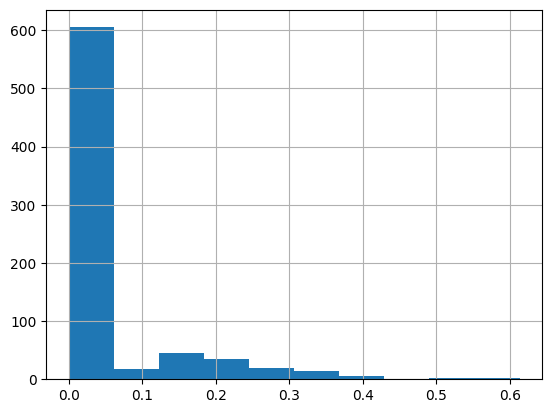

In [24]:
df1['movie'].hist()

In [25]:
##Descriptive Analytics

feature_names = np.array(tv.get_feature_names_out())

def get_top_tf_idf_words(tv_reviews, top_n = 10):
    importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[::1]
    return feature_names[importance[:top_n]]
print([get_top_tf_idf_words(tv_reviews, 10)])

[array(['lino', 'legendary', 'patriotism', 'fabulous', 'belmondo',
       'tremendous', 'treachery', 'pander', 'transcend', 'biographical'],
      dtype=object)]


In [26]:
df = pd.DataFrame(tv_reviews.toarray(), columns=tv.get_feature_names_out())

In [27]:
reviewsP.head()

,Review,Sentiment
0,slowmoving aimless movie distressed drift youn...,0
1,sure lose flat character audience nearly half ...,0
2,attempt artiness black white clever camera ang...,0
3,little music anything speak,0
4,best scene movie gerardo try find song keep ru...,1


In [28]:
reviewsP1 = reviewsP.sample(frac=1, random_state=1).reset_index()
reviewsP1.head()

,index,Review,Sentiment
0,265,premise film ridiculous president u,0
1,519,find well movie youtube,0
2,584,saw child tv back stranger love,1
3,717,time seem film animation dominate disneypixars...,1
4,90,also real treat see anthony quinn play crazy h...,1


In [29]:
reviewsP1.Sentiment.shape

(748,)

In [30]:
train_reviews = reviewsP1.Review[:374]
train_sentiments = reviewsP1.Sentiment[:374]

test_reviews = reviewsP1.Review[374:]
test_sentiments = reviewsP1.Sentiment[374:]

print(train_reviews.shape, train_sentiments.shape)
print(test_reviews.shape, test_sentiments.shape)

(374,) (374,)
(374,) (374,)


In [31]:
cv = CountVectorizer()
cv_train_reviews = cv.fit_transform(train_reviews)
cv_test_reviews = cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test;',cv_test_reviews.shape)

BOW_cv_train: (374, 1552)
BOW_cv_test; (374, 1552)


In [32]:
tv = TfidfVectorizer()

tv_train_reviews = tv.fit_transform(train_reviews)
tv_test_reviews=tv.transform(test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (374, 1552)
Tfidf_test: (374, 1552)


In [33]:
print(tv_train_reviews[0])

  (0, 1043)	0.5805511787663015
  (0, 1125)	0.5805511787663015
  (0, 511)	0.24426676724000135
  (0, 1040)	0.5159984535715536


In [34]:
print(train_sentiments)
print(test_sentiments)

0      0
1      0
2      1
3      1
4      1
      ..
369    0
370    1
371    1
372    1
373    1
Name: Sentiment, Length: 374, dtype: int64
374    1
375    0
376    0
377    1
378    0
      ..
743    1
744    1
745    0
746    0
747    1
Name: Sentiment, Length: 374, dtype: int64


In [35]:
## Decision Tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_bow = DT.fit(cv_train_reviews,train_sentiments)
DT_tfidf= DT.fit(tv_train_reviews,train_sentiments)

DT_bow_predict = DT.predict(cv_test_reviews)
DT_tfidf_predict = DT.predict(tv_test_reviews)
DT_bow_score = accuracy_score(test_sentiments, DT_bow_predict)
print("DT_bow accuracy: ", DT_bow_score)

DT_tfidf_score = accuracy_score(test_sentiments, DT_tfidf_predict)
print("DT_tfidf accuracy: ", DT_tfidf_score)

DT_bow accuracy:  0.6363636363636364
DT_tfidf accuracy:  0.6443850267379679


In [36]:
DT_bow_report = classification_report(test_sentiments, DT_bow_predict, target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,DT_bow_predict),'\n')
print(DT_bow_report)

DT_tfidf_report=classification_report(test_sentiments, DT_tfidf_predict,target_names=['Positive', 'Negative'])
print(confusion_matrix(test_sentiments,DT_tfidf_predict),'\n')
print(DT_tfidf_report)

[[101  94]
 [ 42 137]] 

              precision    recall  f1-score   support

    Positive       0.71      0.52      0.60       195
    Negative       0.59      0.77      0.67       179

    accuracy                           0.64       374
   macro avg       0.65      0.64      0.63       374
weighted avg       0.65      0.64      0.63       374

[[ 99  96]
 [ 37 142]] 

              precision    recall  f1-score   support

    Positive       0.73      0.51      0.60       195
    Negative       0.60      0.79      0.68       179

    accuracy                           0.64       374
   macro avg       0.66      0.65      0.64       374
weighted avg       0.67      0.64      0.64       374



roc_auc_score for DT:  0.6504941985388912


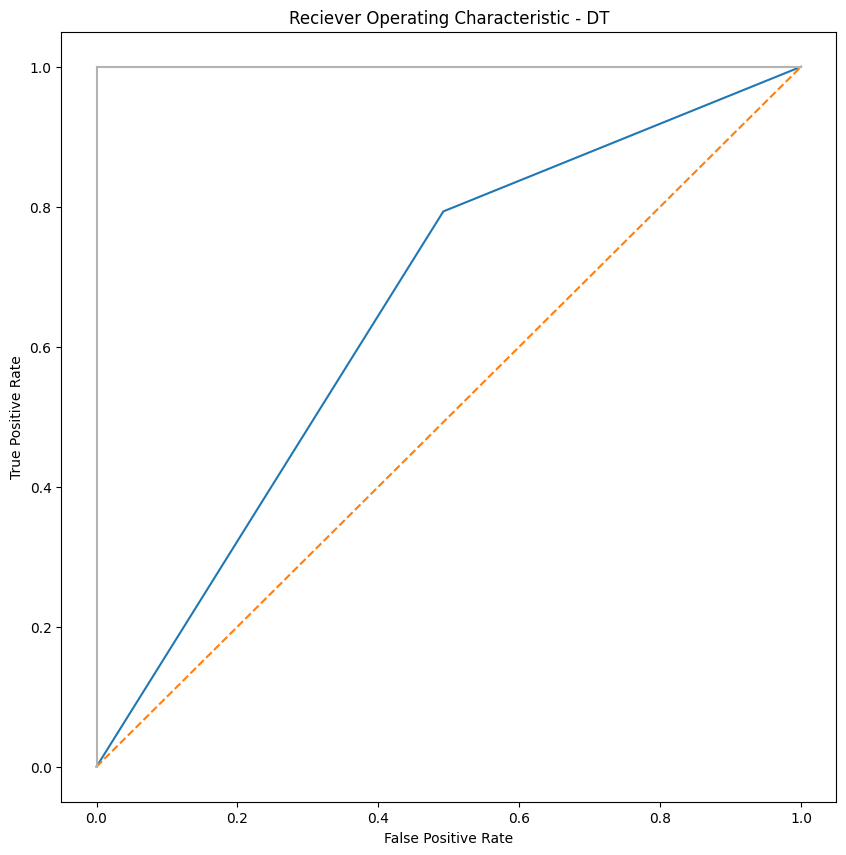

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments,DT_tfidf_predict)
print('roc_auc_score for DT: ', roc_auc_score(test_sentiments, DT_tfidf_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(10,10))
plt.title('Reciever Operating Characteristic - DT')
plt.plot(FP, TP)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0],c=".7"), plt.plot([1,1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

SVM = SGDClassifier(loss='hinge',max_iter=500,random_state=42)
SVM_bow = SVM.fit(cv_train_reviews, train_sentiments)
SVM_tfidf = SVM.fit(tv_train_reviews, train_sentiments)
SVM_bow_predict = SVM.predict(cv_test_reviews)
SVM_tfidf_predict = SVM.predict(tv_test_reviews)
    
SVM_bow_score = accuracy_score(test_sentiments,SVM_bow_predict)
print("SVM_bow accuracy:", SVM_bow_score)

SVM_tfidf_score = accuracy_score(test_sentiments,SVM_tfidf_predict)
print("SVM_tfidf accuracy: ", SVM_tfidf_score)

SVM_bow accuracy: 0.7486631016042781
SVM_tfidf accuracy:  0.7406417112299465


In [39]:
SVM_bow_report = classification_report(test_sentiments,SVM_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,SVM_bow_predict),'\n')
print(SVM_bow_report)

SVM_tfidf_report = classification_report(test_sentiments, SVM_tfidf_predict, target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,SVM_tfidf_predict),'\n')
print(SVM_tfidf_report)

[[129  66]
 [ 28 151]] 

              precision    recall  f1-score   support

    Positive       0.82      0.66      0.73       195
    Negative       0.70      0.84      0.76       179

    accuracy                           0.75       374
   macro avg       0.76      0.75      0.75       374
weighted avg       0.76      0.75      0.75       374

[[123  72]
 [ 25 154]] 

              precision    recall  f1-score   support

    Positive       0.83      0.63      0.72       195
    Negative       0.68      0.86      0.76       179

    accuracy                           0.74       374
   macro avg       0.76      0.75      0.74       374
weighted avg       0.76      0.74      0.74       374



In [40]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=7)

kNN_bow = kNN.fit(cv_train_reviews, train_sentiments)
kNN_tfidf = kNN.fit(tv_train_reviews, train_sentiments)
kNN_bow_predict = kNN.predict(cv_test_reviews)
kNN_tfidf_predict = kNN.predict(tv_test_reviews)

kNN_bow_score = accuracy_score(test_sentiments,kNN_bow_predict)
print("kNN_bow accuracy:", kNN_bow_score)

kNN_tfidf_score = accuracy_score(test_sentiments,kNN_tfidf_predict)
print("kNN_tfidf accuracy: ", kNN_tfidf_score)

kNN_bow accuracy: 0.713903743315508
kNN_tfidf accuracy:  0.7486631016042781


In [41]:
kNN_bow_report = classification_report(test_sentiments,kNN_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,kNN_bow_predict),'\n')
print(kNN_bow_report)

kNN_tfidf_report = classification_report(test_sentiments, kNN_tfidf_predict, target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,kNN_tfidf_predict),'\n')
print(kNN_tfidf_report)

[[128  67]
 [ 40 139]] 

              precision    recall  f1-score   support

    Positive       0.76      0.66      0.71       195
    Negative       0.67      0.78      0.72       179

    accuracy                           0.71       374
   macro avg       0.72      0.72      0.71       374
weighted avg       0.72      0.71      0.71       374

[[138  57]
 [ 37 142]] 

              precision    recall  f1-score   support

    Positive       0.79      0.71      0.75       195
    Negative       0.71      0.79      0.75       179

    accuracy                           0.75       374
   macro avg       0.75      0.75      0.75       374
weighted avg       0.75      0.75      0.75       374



In [42]:
import gensim
from gensim.utils import simple_preprocess
data = reviewsP.Review.values.tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))
words = list(sent_to_words(data))

In [43]:
print(words[:1][0][:30])

['slowmoving', 'aimless', 'movie', 'distressed', 'drift', 'young', 'man']


In [44]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(words)
texts = words
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [45]:
from pprint import pprint

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"movie" + 0.015*"time" + 0.011*"one" + 0.009*"film" + 0.009*"great" + '
  '0.008*"waste" + 0.008*"also" + 0.008*"see" + 0.007*"make" + 0.006*"bad"'),
 (1,
  '0.026*"film" + 0.024*"movie" + 0.012*"character" + 0.009*"like" + '
  '0.008*"art" + 0.007*"well" + 0.007*"one" + 0.007*"ever" + 0.006*"see" + '
  '0.005*"dont"'),
 (2,
  '0.014*"film" + 0.013*"movie" + 0.009*"make" + 0.007*"character" + '
  '0.007*"really" + 0.006*"act" + 0.006*"good" + 0.006*"write" + 0.006*"plot" '
  '+ 0.005*"well"'),
 (3,
  '0.022*"bad" + 0.017*"film" + 0.016*"movie" + 0.014*"make" + 0.011*"good" + '
  '0.009*"script" + 0.009*"even" + 0.008*"character" + 0.008*"one" + '
  '0.006*"watch"'),
 (4,
  '0.034*"movie" + 0.023*"film" + 0.014*"bad" + 0.010*"see" + 0.009*"good" + '
  '0.008*"like" + 0.007*"make" + 0.006*"one" + 0.006*"time" + 0.006*"plot"'),
 (5,
  '0.018*"movie" + 0.015*"film" + 0.011*"well" + 0.010*"bad" + 0.009*"great" + '
  '0.009*"really" + 0.009*"act" + 0.009*"watch" + 0.008*"like" 

In [46]:
import pyLDAvis.gensim_models
import pyLDAvis

pyLDAvis.enable_notebook()
LDAvis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis

c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
c:\Users\Kyle\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.031002  0.008374       1        1  16.348635
4     -0.014649 -0.006487       2        1  16.188651
6      0.024804  0.022492       3        1  15.453096
9     -0.051205  0.076651       4        1  11.313644
0      0.048507 -0.086228       5        1   8.342803
2      0.080526  0.036488       6        1   7.179032
7     -0.031997 -0.000965       7        1   6.852393
8     -0.073227 -0.061386       8        1   6.389632
1     -0.013464  0.020201       9        1   6.187160
3     -0.000297 -0.009141      10        1   5.744953, topic_info=           Term        Freq       Total Category  logprob  loglift
142         bad   67.000000   67.000000  Default  30.0000  30.0000
98         film  141.000000  141.000000  Default  29.0000  29.0000
8     character   42.000000   42.000000  Default  28.0000  28.0000
364        time   34.000000   34.000000  Default  27.0000  27.0000
4         movie  157.000000  157.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
125       actor    1.406332   22.829224  Topic10  -5.7159   0.0698
226        give    1.383120   19.626133  Topic10  -5.7325   0.2043
616        suck    1.284403   12.027907  Topic10  -5.8065   0.6199
397       write    1.295902   18.708253  Topic10  -5.7976   0.1871
1016  wonderful    1.280899   13.954908  Topic10  -5.8093   0.4686

[755 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2123      3  0.618775  aailiyah
1651      9  0.786142  accolade
15        1  0.312928       act
15        2  0.142240       act
15        3  0.056896       act
...     ...       ...       ...
401       4  0.202363      year
401       6  0.202363      year
401       7  0.067454      year
401       9  0.067454      year
398       7  0.365021       yes

[1393 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 7, 10, 1, 3, 8, 9, 2, 4])